In [18]:
import pandas as pd
url = "https://data.cityofnewyork.us/resource/nie4-bv6q.csv?$limit=100000"
df = pd.read_csv(url)
df.head()

,dbn,school_name,year,total_enrollment,grade_3k_pk_half_day_full,grade_k,grade_1,grade_2,grade_3,grade_4,...,multiple_race_categories_1,white,white_1,students_with_disabilities,students_with_disabilities_1,english_language_learners,english_language_learners_1,poverty,poverty_1,economic_need_index
0,01M015,P.S. 015 Roberto Clemente,2015-16,176,14,32,33,39,23,17,...,0.017,2,0.011,60,0.341,16,0.091,149,84.7%,88.9%
1,01M015,P.S. 015 Roberto Clemente,2016-17,178,17,28,33,27,31,24,...,0.022,4,0.022,51,0.287,12,0.067,152,85.4%,88.2%
2,01M015,P.S. 015 Roberto Clemente,2017-18,190,17,28,32,33,23,31,...,0.011,6,0.032,49,0.258,8,0.042,161,84.7%,89.0%
3,01M015,P.S. 015 Roberto Clemente,2018-19,174,13,20,33,30,30,20,...,0.006,6,0.034,39,0.224,8,0.046,147,84.5%,88.8%
4,01M015,P.S. 015 Roberto Clemente,2019-20,190,14,29,28,38,33,29,...,0.011,9,0.047,44,0.232,17,0.089,155,81.6%,86.9%


In [19]:
def pct_to_float(row, cols):
    for col in cols:
        try:
            float(row[col])
            continue
        except:
            pass

        if "Below" in row[col]:
            row[col] = .04
        elif "Above" in row[col]:
            row[col] = .96

        pct = str(row.poverty_1)[:-1]
        row[col] = float(pct) / 100
    return row

In [24]:
pct_cols = [col for col in df.columns if col.endswith("_1") and col != "grade_1"]

pct_cols
df = df.apply(lambda x: pct_to_float(x, pct_cols), axis=1)
for col in pct_cols:
    df[col] = pd.to_numeric(clean_df[col])

df

,dbn,school_name,year,total_enrollment,grade_3k_pk_half_day_full,grade_k,grade_1,grade_2,grade_3,grade_4,...,multiple_race_categories_1,white,white_1,students_with_disabilities,students_with_disabilities_1,english_language_learners,english_language_learners_1,poverty,poverty_1,economic_need_index
0,01M015,P.S. 015 Roberto Clemente,2015-16,176,14,32,33,39,23,17,...,0.017000,2,0.011000,60,0.341000,16,0.091000,149,0.847000,88.9%
1,01M015,P.S. 015 Roberto Clemente,2016-17,178,17,28,33,27,31,24,...,0.022000,4,0.022000,51,0.287000,12,0.067000,152,0.854000,88.2%
2,01M015,P.S. 015 Roberto Clemente,2017-18,190,17,28,32,33,23,31,...,0.011000,6,0.032000,49,0.258000,8,0.042000,161,0.847000,89.0%
3,01M015,P.S. 015 Roberto Clemente,2018-19,174,13,20,33,30,30,20,...,0.006000,6,0.034000,39,0.224000,8,0.046000,147,0.845000,88.8%
4,01M015,P.S. 015 Roberto Clemente,2019-20,190,14,29,28,38,33,29,...,0.011000,9,0.047000,44,0.232000,17,0.089000,155,0.816000,86.9%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9091,84X730,Bronx Charter School for the Arts,2015-16,323,0,51,57,55,55,57,...,0.018576,5,0.015480,61,0.188854,49,0.151703,268,0.829721,0.8211898803710938
9092,84X730,Bronx Charter School for the Arts,2016-17,320,0,53,53,55,52,53,...,0.009375,3,0.009375,67,0.209375,51,0.159375,235,0.734375,0.8401687741279602
9093,84X730,Bronx Charter School for the Arts,2017-18,314,0,50,51,54,51,52,...,0.009554,1,0.003185,68,0.216561,57,0.181529,258,0.821656,0.8905859589576721
9094,84X730,Bronx Charter School for the Arts,2018-19,430,0,49,54,49,54,51,...,0.013953,3,0.006977,103,0.239535,71,0.165116,363,0.844186,0.8878604769706726


In [17]:
pct_cols = [col for col in df.columns if col.endswith("_1")]

clean_df = df.apply(lambda x: pct_to_float(x, pct_cols), axis=1)
for col in pct_cols:
    clean_df[col] = pd.to_numeric(clean_df[col])

clean_df.poverty_1.unique()


array([0.847     , 0.854     , 0.845     , 0.816     , 0.804     ,
       0.764     , 0.77      , 0.735     , 0.746     , 0.608     ,
       0.583     , 0.736     , 0.678     , 0.759     , 0.009     ,
       0.825     , 0.818     , 0.773     , 0.93      , 0.922     ,
       0.865     , 0.546     , 0.907     , 0.541     , 0.577     ,
       0.625     , 0.567     , 0.606     , 0.928     , 0.901     ,
       0.919     , 0.936     , 0.947     , 0.787     , 0.751     ,
       0.884     , 0.887     , 0.706     , 0.686     , 0.68      ,
       0.663     , 0.867     , 0.858     , 0.921     , 0.881     ,
       0.914     , 0.918     , 0.827     , 0.832     , 0.221     ,
       0.225     , 0.27      , 0.282     , 0.873     , 0.876     ,
       0.842     , 0.83      , 0.479     , 0.481     , 0.457     ,
       0.491     , 0.47      , 0.39      , 0.398     , 0.438     ,
       0.412     , 0.408     , 0.462     , 0.495     , 0.566     ,
       0.57      , 0.693     , 0.689     , 0.828     , 0.852  

In [172]:
df["pk"] = df["grade_3k_pk_half_day_full"] > 0
df["elementary"] = df["grade_1"] > 0
df["middle"] = df["grade_7"] > 0
df["hs"] = df["grade_10"] > 0

df["ay"] = df.year.apply(lambda year: int(year[:4]))
df["district"] = df.dbn.apply(lambda dbn: int(dbn[:2]))
df["school_num"] = df.dbn.apply(lambda dbn: int(dbn[3:]))
df["boro"] = df.dbn.apply(lambda dbn: dbn[2])
# df["boro_name"] = df.boro.apply(lambda x: boros[x])

def school_type(school):
    """
        Any school that serves middle school kids
        is considered a middle school here.
    """

    if school["middle"]:
        return "MS"
    if school["elementary"]:
        return "PS"
    if school["hs"]:
        return "HS"
    return "NA"


df["school_type"] = df.apply(school_type, axis=1)

def short_name(row):
    sn = row.school_name.upper()
    if "P.S." in sn or "P. S." in sn:
        return f"PS {row.school_num}"

    if "M.S." in sn or "M. S." in sn:
        return f"MS {row.school_num}"

    if "I. S." in sn or "I.S." in sn:
        return f"IS {row.school_num}"

    return f"{row.school_type} {row.school_num}"



df["short_name"] = df.apply(short_name, axis=1)

df["short_name"].unique()



array(['PS 15', 'PS 19', 'PS 20', ..., 'MS 717', 'PS 718', 'PS 730'],
      dtype=object)

In [171]:
import matplotlib.pyplot as plt

ay15 = df.query("district==13 and ay==2015")
ay19 = df.query("district==13 and ay==2019")

def pct(district):

    def pov(row):
        p = row.poverty
        total = int(row.total_enrollment)
        if p == "Above 95%":
            return 96.0

        p = int(p)
        return round((p / total) * 100, 1)

    district["white"] = float(district.white_1 * 100)
    district["asian"] = float(district.asian_1 * 100)
    district["black"] = float(district.black_1 * 100)
    district["hispanic"] = float(district.hispanic_1 * 100)
    district["poverty"] = float(district.apply(pov, axis=1))
    district = district[["school_name", "white", "black", "hispanic", "asian", "poverty" ]]

    district = district.sort_values(by=["poverty"])
    return district

# df.query("school_num==261 & ay==2019")
ay15 = pct(ay15)
ay19 = pct(ay19)

def compare(a, b, keys):
    for k in keys:
        delta = b[k] - a[k]
        b[k] = f"{b[k]} {delta}"
    
    return b

ay15.dtypes

# compare(ay15, ay19, ["white", "black", "hispanic", "asian", "poverty" ])


TypeError: cannot convert the series to <class 'float'>

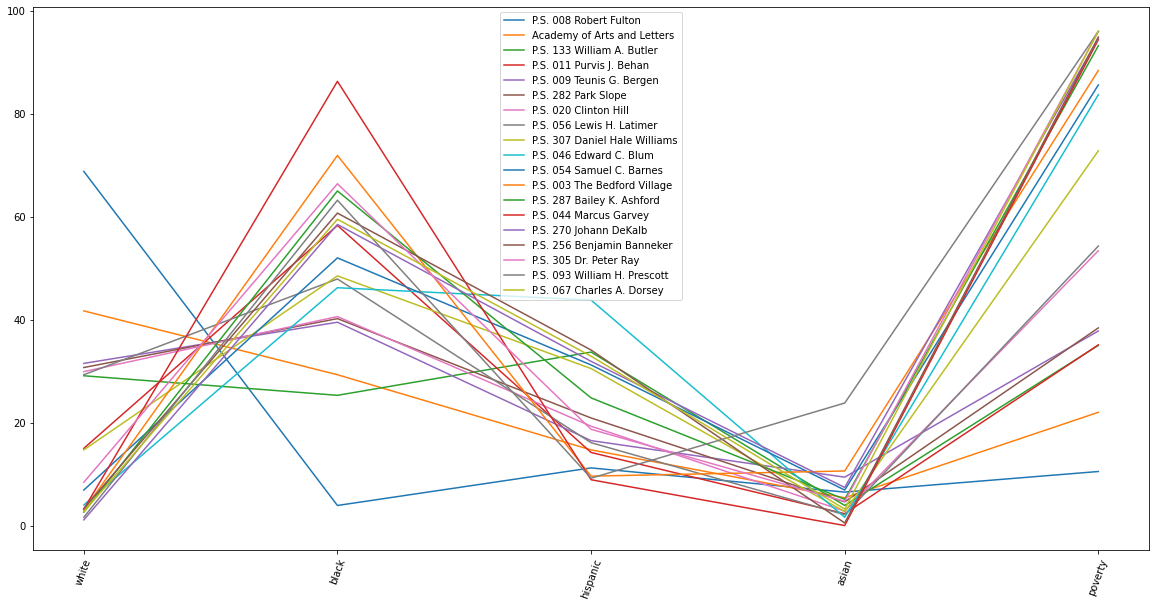

In [128]:
import matplotlib.pyplot as plt


plt.figure(figsize=(20,10))

y = list(range(0,110,10))
x = ["white", "black", "hispanic", "asian", "poverty" ]
# plot = district.plot(y=y,x=["white", "black", "hispanic", "asian" ])
# data = district[["white", "black", "hispanic", "asian" ]].to_numpy()
# plt.line(y=y, data)
for row in district.to_numpy():
    plt.plot(row[1:], label=row[0])




    

plt.xticks(ticks=range(0,len(x)), labels=x, rotation=70)
plt.legend()



plt.show()
